In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env

C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-

defaultdict(<class 'list'>, {0: [2, 1, 3], 1: [2, 3], 2: [3, 4], 3: [4], 5: [2, 3, 4]})


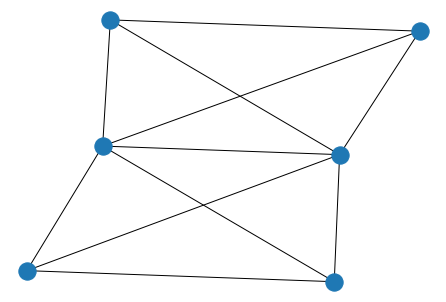

In [3]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
#data = [(0,1),(0,8),(0,7),(0,12),(0,2),(1,2),(1,12),(1,5),(1,6),(1,14),(1,7),(1,8),(5,6),(5,14),(6,14),(8,7),(12,2),(2,3),(2,4),(4,13),(4,9),(4,11),(4,10),(10,11),(9,13),(3,4),(9,10),(9,11),(5,15)]
d = defaultdict(list)
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

In [4]:
env = gym.make('wmac-graph-v0',graph=G)
env.reset()

Intermediate nodes 2
Intermediate nodes 3
MultiDiscrete([6 6 6 6 6 6 2 2 2 2 2 2])
[3 5 3 2 0 4 0 0 0 0 0 0]
MultiDiscrete([6 6 6 6 6 6 2 2 2 2 2 2])
[3 2 0 2 0 3 1 1 1 0 0 0]
src:  0 dest:  4
src:  0 dest:  2
src:  2 dest:  5
src:  2 dest:  4
src:  1 dest:  2
src:  1 dest:  3
src:  3 dest:  1
src:  3 dest:  4
src:  4 dest:  2
src:  4 dest:  2
src:  5 dest:  3
src:  5 dest:  1
src:  0 dest:  1
src:  0 dest:  1
src:  2 dest:  1
src:  2 dest:  3
src:  1 dest:  2
src:  1 dest:  0
src:  3 dest:  2
src:  3 dest:  5
src:  4 dest:  0
src:  4 dest:  0
src:  5 dest:  1
src:  5 dest:  3
[3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0]


array([3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0])

In [6]:
check_env(env)

src:  0 dest:  5
src:  0 dest:  5
src:  2 dest:  0
src:  2 dest:  1
src:  1 dest:  4
src:  1 dest:  0
src:  3 dest:  0
src:  3 dest:  1
src:  4 dest:  5
src:  4 dest:  1
src:  5 dest:  1
src:  5 dest:  1
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
received action [1 4 1 0 3 4 0 1 0 1 0 1]
nxt_hop_list:  [1, 4, 1, 0, 3, 4]
tw_status_list [0, 1, 0, 1, 0, 1]


AttributeError: 'NodeView' object has no attribute 'nodes'

In [ ]:
model = A2C(MlpPolicy, env, verbose=1) #,tensorboard_log="./diffrange_tensorboard/"
model.learn(total_timesteps=5000)
model.save("a2c_wmac")

In [ ]:
del model # remove to demonstrate saving and loading

In [ ]:
model = A2C.load("a2c_wmac")

obs = env.reset()
count = 0
while count < 100:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    count = count + 1
    print("count :", count)
    if done:
        break
    
    #env.render()